# Word Cloud of Hamlet

In [1]:
%%capture installation_output 
!pip install wordcloud
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import io
import sys

In [2]:
# Opens file containing Hamlet
file = open('pg1787.txt', 'r')
file_content = file.read()

In [3]:
def calculate_frequencies(file_contents):
    # Punctuations and common uninteresting words to exclude.
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    
    word_dictionary = {}
    text = file_contents.split(" ")
    for word in text:
        alphabetic_string = ""
        for character in word:
            if character not in punctuations:
                alphabetic_string += character.lower()
        if alphabetic_string not in uninteresting_words:
            if alphabetic_string not in word_dictionary.keys():
                word_dictionary[alphabetic_string] = 1
            else:
                word_dictionary[alphabetic_string] += 1
    
    # Creates wordcloud object
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(word_dictionary)
    return cloud.to_array()

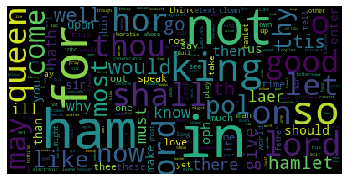

In [4]:
# Displays wordcloud

myimage = calculate_frequencies(file_content)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()

In [5]:
file.close()